In [4]:
import pandas as pd
from os.path import join
from collections import defaultdict
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [9]:
roots = [
        '/data/juma/data/ddos/CSVs/WS/PCAP-03-11_l',
    '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SEL_(230,1,1)/PCAP-03-11_l',
        #'/data/juma/data/ddos/CSVs_r_1.0/SR_20/RPS_SI_5/PCAP-03-11_l',
        #'/data/juma/data/ddos/CSVs_r_1.0/SR_10/RPS_SI_10/PCAP-03-11_l',        
        ]

In [10]:
counts_d = defaultdict(list)
avg = []
for root in roots:
    df = pd.read_csv(join(root,'flow_dist.csv'))
    s = 0
    for row in df.itertuples():
        counts_d[row[1]].append(row[3])
        s+=row[3]
    avg.append(s/df.shape[0])

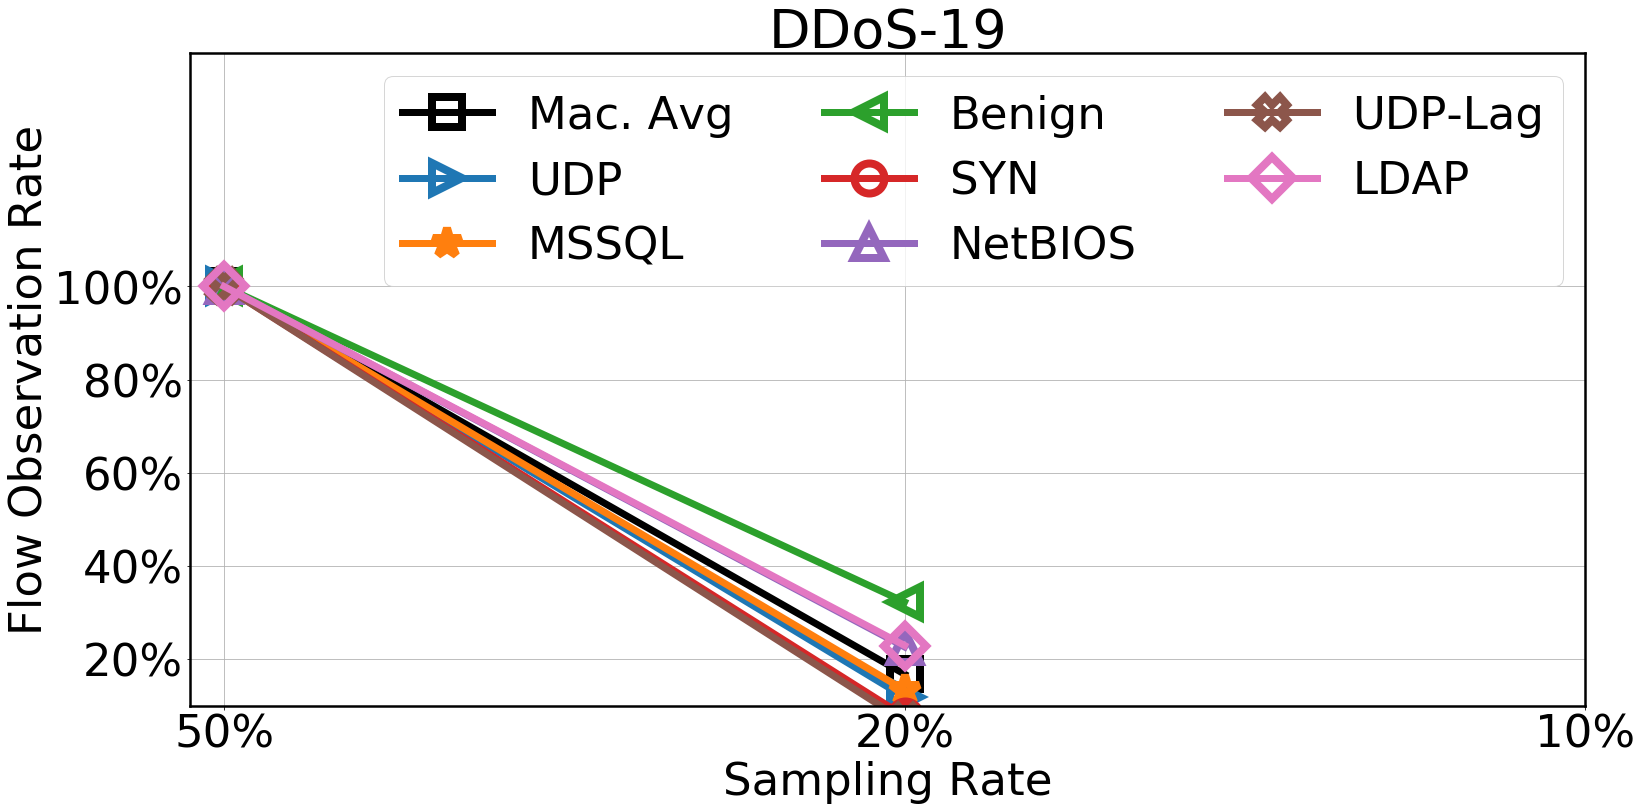

In [11]:
figure(figsize=(25,12))
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
markers = ['>','*','<','o','^','X','D','8','h','d']

plt.plot(avg,label = 'Mac. Avg',color='black',linewidth=7,marker='s',markersize=30,markeredgewidth=8,markerfacecolor='none')
for i,(label,counts) in enumerate(counts_d.items()):
    plt.plot(counts,label=label,linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')
plt.grid()
plt.legend(ncol=3)
plt.title('DDoS-19')
plt.ylabel('Flow Observation Rate')
plt.xlabel("Sampling Rate")
plt.ylim([10,150])
plt.xticks(np.arange(3),['50%','20%','10%'])
plt.yticks(np.arange(20,120,20),[str(i)+'%' for i in np.arange(20,120,20)])

plt.savefig('/data/juma/data/ddos/observation_rate.png')
plt.show()


In [ ]:
avg